## Exercise 1

Consider the following bivariate distribution:

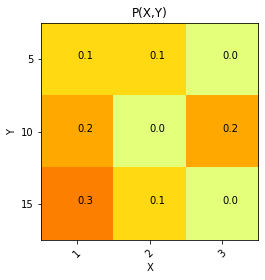

In [1]:
import matplotlib.pyplot as plt
import numpy as np

freq = [[0.1,0.1,0.],[0.2,0.,0.2],[0.3,0.1,0.]]

plt.clf()
plt.imshow(freq, interpolation='nearest', cmap=plt.cm.Wistia)
X_values = ['1','2','3']
Y_values = ['5','10','15']
plt.ylabel('Y')
plt.xlabel('X') 
plt.title('P(X,Y)') 
plt.xticks(np.arange(len(X_values)), X_values, rotation=45)
plt.yticks(np.arange(len(Y_values)), Y_values)
for i in range(len(X_values)):
    for j in range(len(Y_values)):
        plt.text(j,i, str(freq[i][j]))
plt.show()

**1) Show that P(X,Y) is a valid distribution function.**

**2) Show that X and Y are not independent.**

**3) Find the marginal distribution of X.**

**4) Find P(X=2 | Y < 15).**

## Exercise 2

Let's suppose the following joint probability distribution is known for a medicine:

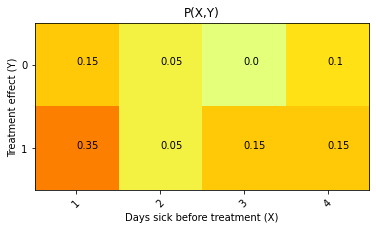

In [2]:
freq = [[0.15,0.05,0., 0.1],[0.35,0.05,0.15,0.15]]

plt.clf()
plt.imshow(freq, interpolation='nearest', cmap=plt.cm.Wistia)
X_values = ['1','2','3','4']
Y_values = ['0','1']
plt.ylabel('Treatment effect (Y)')
plt.xlabel('Days sick before treatment (X)') 
plt.title('P(X,Y)') 
plt.xticks(np.arange(len(X_values)), X_values, rotation=45)
plt.yticks(np.arange(len(Y_values)), Y_values)
for i in range(len(X_values)):
    for j in range(len(Y_values)):
        plt.text(i,j, str(freq[j][i]))
plt.show()

Let Y represent the treatment outcome (0 = not recovered, 1 = recovered) and X represent the number of days sick before treatment. Find:

**1) P(Y=1)**

**2) P(Y=1 | X=3)**

**3) P(Y=1 | X>=3)**

**4) P(X=2 | Y=0)**

**5) P(X<=2 | Y=0)**

## Exercise 3

A hospital has 5 ambulances, two of them have one bed inside while the rest have two beds inside. Let X = number of two beds ambulances used on any given day and Y = number of one bed ambulances used on any given day.

Suppose the joint probability of X and Y is as follows:

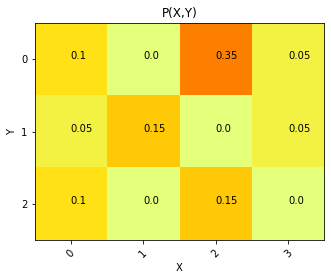

In [3]:
freq = [[0.1,0.0,0.35, 0.05],[0.05,0.15,0.,0.05],[0.10, 0.0, 0.15,0.0]]

plt.clf()
plt.imshow(freq, interpolation='nearest', cmap=plt.cm.Wistia)
X_values = ['0','1','2','3']
Y_values = ['0','1', '2']
plt.ylabel('Y')
plt.xlabel('X') 
plt.title('P(X,Y)') 
plt.xticks(np.arange(len(X_values)), X_values, rotation=45)
plt.yticks(np.arange(len(Y_values)), Y_values)
for i in range(len(X_values)):
    for j in range(len(Y_values)):
        plt.text(i,j, str(freq[j][i]))
plt.show()

Find the probability that, on any given day:

**1) None of the ambulances are hired.**

**2) All of the one bed ambulances are hired**

**3) At least 2 of the ambulances are hired.**

**4) All of the one bed ambulances are hired, if all the 2 beds ambulances have been hired.
Compare your answer to (2) and reason whether X and Y are independent.**

## Exercise 4

Let's consider the following data:

(2, 352)


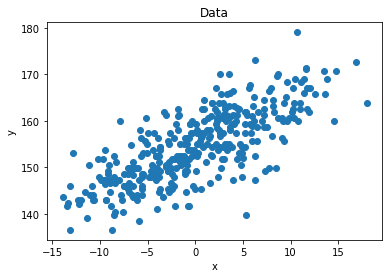

In [4]:
import pandas as pd
%run ./tools.py

data = np.load('./data_exercise4.npy')
print(data.shape)
x = data[0,:] - np.mean(data[0,:])
y = data[1,:]

plt.scatter(x,y)
plt.title('Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

df = pd.DataFrame({'x':x, 'y':y})

According to the plot above, a linear relationship seems to exist between x and y. Therefore, we model the data according to $y_i = \mathcal{N}(\mu_i, \sigma^{2})$ with $\mu_i = a + b*x_i$. We find a posterior distribution for the parameters a, b and $\sigma^{2}$ using a Laplace approximation.

In [5]:
expr = 'y ~ x'

# Initializing the likelihood
likelihood = 'gaussian'

# Defining the prior with hyperparameters 
prior_a_mean = 10
prior_a_sigma = 1
prior_a = ['gaussian', [prior_a_mean, prior_a_sigma]]

prior_b_mean = 0
prior_b_sigma = 1
prior_b = ['gaussian', [prior_b_mean, prior_b_sigma]]

sigma_inf = 20
sigma_sup = 50
prior_sigma_unif = [sigma_inf, sigma_sup]
prior_sigma = ['uniform', prior_sigma_unif]

priors = [prior_a, prior_b, prior_sigma]

solution_regression = laplace_solution_regression(expr, df, likelihood, priors)

/Users/mlorenzi/miniconda3/lib/python3.6/site-packages/scipy/optimize/_numdiff.py:497: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/mlorenzi/miniconda3/lib/python3.6/site-packages/scipy/optimize/_numdiff.py:497: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: 2570.470633145396
 hess_inv: array([[ 0.82792055, -0.04983026, -0.13109398],
       [-0.04983026,  0.34965412, -0.13439929],
       [-0.13109398, -0.13439929,  1.27321127]])
      jac: array([ -7.71350098,   6.14801025, -16.41778564])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 55
      nit: 2
     njev: 11
   status: 2
  success: False
        x: array([12.7230663 ,  2.19702782, 69.17397863])


**1) Examine the posterior distribution for the regression parameters, and decide if the solution is correct or not.**

**2) In case there is any problem with the model, modify the code above in order to get a proper solution**

## Exercise 5

Consider the following function on the interval [0, 3]:

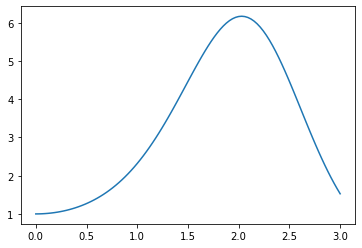

In [6]:
x = np.linspace(0., 3., 100)
f = np.exp(x*np.sin(x))

plt.plot(x, f)
plt.show()

**1) Approximate this function using the Laplace approximation.**

**2) Plot the original function and your approximation on the same graph.**

## Exercise 6

From the file grades.csv we are interested in predicting the final evaluation score from the midterm one. 

- (6.1) Find appropriate priors for a linear model. Sample from the priors to verify that the choice of all the priors parameters is compatible with the regression problem
- (6.2) Fit a regression model using these priors (you can use either our Laplace implementation or Stan)
- (6.3) Sample from the posterior and plot the related regression function. Is this simulation compatible with the observations?
- (6.4) Compute the standard deviation for the final score of a student with midterm score of 60.



## Exercise 7

From the exercise above, fit a quadratic model and compare it to the linear one for this regression problem.

## Exercise 8

The file *data_exam.csv* contains the data from a clinical study on neurodegenerative diseases.
The variables that we investigate are the following:

- DX: diagnosis (normal - NL - or Dementia)

- PTGENDER: sex (male or female)

- AGE

- APOE4: genetic risk factor (non carrier - 0 - or carrier - 1 -)

- ADAS13: clinical score (the higher the more pathological/dementia)

Questions:

- (8.1) What is a reasonable likelihood function to mode the probability of Dementia diagnosis as a function of ADAS13? 
- (8.2) According to your reply to question 8.1, fit a model for the probability of Dementia as a function of ADAS13;
- (8.3) Compute the training accuracy of the the predictions against the data, and verify that the model gives plausible results;
- (8.4) Find a 95% confidence interval for the Dementia probability of a patient with ADAS13 equal to 15;
- (8.5) Find a 95% confidence interval for the Dementia probability of a patient with ADAS13 equal to 20;
- (8.6) Find a 95% confidence interval for the difference between probabilities. Is the difference between the dementia risk of these two patients significant? 


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('data_exam.csv').dropna().drop('Unnamed: 0', axis =1)
data = data.replace({'DX': {'NL': 0, 'Dementia': 1}, 'PTGENDER': {'Male': 0, 'Female': 1}})

In [8]:
data

PTGENDER  ADAS13  APOE4   AGE  DX
0           0   18.67    0.0  74.3   0
1           0   31.00    1.0  81.3   1
2           0   14.67    0.0  73.7   0
3           0   40.33    1.0  75.4   1
4           1    7.00    0.0  84.5   0
..        ...     ...    ...   ...  ..
852         1    6.00    1.0  67.0   0
853         1    5.00    0.0  74.3   0
854         0   11.00    1.0  68.5   0
855         1   18.00    1.0  75.5   0
856         0   14.00    0.0  69.3   0

[846 rows x 5 columns]